In [91]:
import numpy as np
from numpy.random import rand,randn
from numpy.fft import fft, ifft, fftfreq

def gen_signal(N=10001):
    Nf=3
    t=np.arange(N, dtype=float)
    Ts=rand(Nf)*2000+10
    fs=1./Ts
    
    amp= rand(Nf)*200+100
    
    phi=rand(Nf)*2*np.pi
    
    h=np.zeros(N)
    for j in range(len(fs)):
        h += amp[j]*np.sin(2*np.pi*t*fs[j]+phi[j])
    hn=h+randn(N)*3*h + randn(N)*700
    return t,h,hn

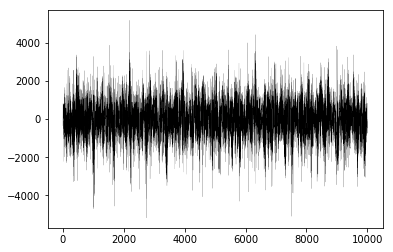

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
t,h,hn=gen_signal()
plt.plot(t,h, linewidth=0.11)
plt.plot(t,hn,'k', linewidth=0.11)
plt.show()

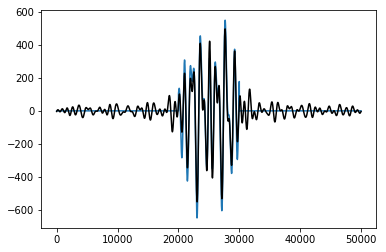

In [111]:
t,h0,hn=gen_signal()
def zero_padding(f, npadding):
    lenf=len(f)
    l=npadding*2+lenf
    ret=np.zeros(l, dtype=f.dtype)
    ret[npadding: npadding+lenf]=f
    return ret
h0=zero_padding(h0, 20000)
hn=zero_padding(hn,20000)
N=len(hn)
freq=fftfreq(N)
ind_freq=np.arange(1, N/2+1, dtype=int)
hf=fft(hn)
psd=np.abs(hf[ind])**2+np.abs(hf[-ind])**2
idh=np.where(psd>2e11)
Hn_cut=np.zeros_like(hn, dtype=complex)
Hn_cut[ind_freq[idh]]=hf[ind_freq[idh]]
Hn_cut[-ind_freq[idh]]=hf[-ind_freq[idh]]
plt.plot(h0)
plt.plot(ifft(Hn_cut), 'k')
plt.show()

In [112]:
np.correlate?